In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex
from ROOT import gROOT
from array import array
import math
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
time = [100,100,100,100,100,100,200,200,600,600,900,900]
t=[-5,5,10,-10,15,-15,20,-20,25,-25,30,-30]
e=[3988,3742,2199,1661,432,201,104,64,77,283,43,58]
se=[]
st=[]
N = [39.88,37.42,21.99,16.61,4.32,2.01,0.54,0.32,0.128,0.472,0.048,0.067]
R = []
for i in t:
    x = (i/180.0)*3.14
    R.append(x)
    
for i in t:
    x = (5.0/180)*3.14
    st.append(x)
for i in N:
    y = math.sqrt(i)
    se.append(y)
ndata = len(t)



sigma_n = []
for i in e:
    s = math.sqrt(i)

    sigma_n.append(s)
sigma_N = []
for i in range(ndata):
    s2 = sigma_n[i]**(2)/time[i]**2+(1.0/time[i]**4)*e[i]**2*(1.0/100)
    s = math.sqrt(s2)
    sigma_N.append(s)
sigma_F = []
for i in range(ndata):
    x2 = 4*math.pi**2*(math.cos(R[i])**2*5*math.pi*(1.0/180)+math.sin(R[i])**2*sigma_N[i]**2)
    x = math.sqrt(x2)
    sigma_F.append(x)

print sigma_F
print "sigma_F"

[1.8812090372137156, 1.8792341027403874, 1.8982750341193722, 1.8812816926678053, 1.824491847693964, 1.8076789569624236, 1.7477197438517527, 1.7463992960832861, 1.6828275521164702, 1.68402481382826, 1.6078469135726303, 1.6079036974052456]
sigma_F


In [3]:
print sigma_n
print "sigma_n"

[63.150613615387776, 61.171888968708494, 46.89349635077342, 40.755367744629666, 20.784609690826528, 14.177446878757825, 10.198039027185569, 8.0, 8.774964387392123, 16.822603841260722, 6.557438524302, 7.615773105863909]
sigma_n


In [4]:
print sigma_N
print "sigma_N"

[0.6327641064409391, 0.6128623470241911, 0.4694502743635368, 0.4078920103409725, 0.20789098681761073, 0.14178871640578455, 0.050990858004155995, 0.04000031999872001, 0.014624956286206699, 0.028037783272182936, 0.0072860447387293765, 0.008461973147220261]
sigma_N


In [5]:
R  =  array( 'f', R)
N  =  array( 'f', N)
st= array('f',st)
se=array('f',se)
sigma_F = array('f', sigma_F)

In [6]:
C = []

for i in range(ndata):
    c = N[i]*(2*3.14*math.sin(R[i]))
    if c<0:
        c = -c
    C.append(c)
print C
print max(C)
C = array('f', C)

[21.81680396700701, 20.471031660787872, 23.968292457499395, 18.104290881850524, 7.018179110144934, 3.2654026351660264, 1.1592947699788039, 0.6869894506668528, 0.3395563281127054, 1.2521139080330572, 0.15065069524026062, 0.2102832655163733]
23.9682924575


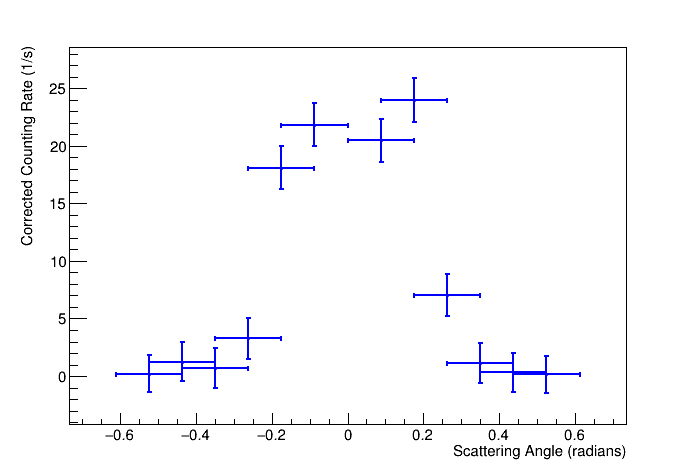

In [7]:
c1 = TCanvas( 'c1', '..', 200, 10, 700, 500 )
             
mygraph = TGraphErrors(ndata,R,C,st,sigma_F)
mygraph.Draw("AP")
mygraph.SetTitle("")
mygraph.SetLineColor( 4 )
mygraph.SetLineWidth( 2 )
mygraph.SetMarkerColor( 9)
mygraph.SetMarkerStyle( 7 )

mygraph.GetXaxis().SetTitle( 'Scattering Angle (radians)' )
mygraph.GetYaxis().SetTitle( 'Corrected Counting Rate (1/s)')
c1.Draw()

 FCN=0.491055 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=1.37785e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.33016e+00   8.02457e-01   4.74003e-04  -1.21629e-06
   2  p1           7.19733e-03   1.88754e-02   1.11089e-05   2.78721e-03


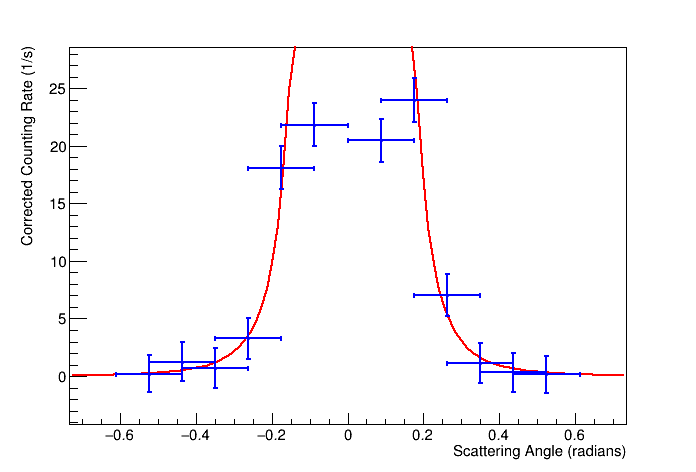

In [8]:
l1=TF1("l1", "([0]*sin(x/2-[1]))**(-4)")
#l2=TF1('l2','gaus')
#l2=TF1('l2','pol1')
l1.SetParameters(1,0)
#l1.TLegend()
mygraph.Fit(l1,'','',-30,30)
#mygraph.Fit(l2,'','')
legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
#legend.SetLineWidth (0)
chi2 = l1.GetChisquare()





c1.Draw()

In [9]:
print chi2

0.491054692867
